# CA Coronavirus Cases and Deaths Trends

CA's [Blueprint for a Safer Economy](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) assigns each county [to a tier](https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/COVID19CountyMonitoringOverview.aspx) based on case rate and test positivity rate. What's opened / closed [under each tier](https://www.cdph.ca.gov/Programs/CID/DCDC/CDPH%20Document%20Library/COVID-19/Dimmer-Framework-August_2020.pdf).

Tiers, from most severe to least severe, categorizes coronavirus spread as <strong><span style='color:#6B1F84'>widespread; </span></strong>
<strong><span style='color:#F3324C'>substantial; </span></strong><strong><span style='color:#F7AE1D'>moderate; </span></strong><strong><span style = 'color:#D0E700'>or minimal.</span></strong>
**Counties must stay in the current tier for 3 consecutive weeks and metrics from the last 2 consecutive weeks must fall into less restrictive tier before moving into a less restrictive tier.**

We show *only* case charts labeled with each county's population-adjusted tier cut-offs.

**Related daily reports:** 
1. **[US counties report on cases and deaths for select major cities](https://cityoflosangeles.github.io/covid19-indicators/us-county-trends.html)**
1. **[Los Angeles County, detailed indicators](https://cityoflosangeles.github.io/covid19-indicators/coronavirus-stats.html)**

Code available in GitHub: [https://github.com/CityOfLosAngeles/covid19-indicators](https://github.com/CityOfLosAngeles/covid19-indicators)

In [1]:
import altair as alt
import altair_saver
import os
import pandas as pd

import default_parameters
import make_charts
import us_county_utils

from IPython.display import display_html, Markdown, HTML, Image

# Default parameters
time_zone = default_parameters.time_zone
start_date = default_parameters.start_date
today_date = default_parameters.today_date

fulldate_format = default_parameters.fulldate_format

In [2]:
STATE = "CA"

jhu = us_county_utils.clean_jhu(start_date)
jhu = jhu[jhu.state_abbrev==STATE]

hospitalizations = us_county_utils.clean_hospitalizations(start_date)

#ca_counties = list(jhu[jhu.state_abbrev==STATE].county.unique()) 

data_through = jhu.date.max()

In [3]:
display(Markdown(
        f"Report updated: {default_parameters.today_date.strftime(fulldate_format)}; "
        f"data available through {data_through.strftime(fulldate_format)}."
    )
)

Report updated: 11/24/20; data available through 11/23/20.

In [4]:
title_font_size = 9
font_name = make_charts.font_name
grid_opacity = make_charts.grid_opacity
domain_opacity = make_charts.domain_opacity
stroke_opacity = make_charts.stroke_opacity
chart_width = make_charts.chart_width
chart_height = make_charts.chart_height


def plot_charts(cases_df, hospital_df, county_name):
    cases_df = cases_df[cases_df.county==county_name]
    hospital_df = hospital_df[hospital_df.county==county_name]
    
    name = cases_df.county.iloc[0]
    
    cases_chart, deaths_chart = make_charts.setup_cases_deaths_chart(cases_df, "county", name)
    hospitalizations_chart = make_charts.setup_county_covid_hospital_chart(
        hospital_df.drop(columns = "date"), county_name)
    
    chart = (alt.hconcat(cases_chart, deaths_chart, hospitalizations_chart)
             .configure_title(
                 fontSize=title_font_size, font=font_name, anchor="middle", color="black"
             ).configure_axis(
                 gridOpacity=grid_opacity, domainOpacity=domain_opacity
             ).configure_view(strokeOpacity=stroke_opacity)
            )
    
    
    county_state_name = county_name + f", {STATE}"
    display(Markdown(f"#### {county_state_name}"))
    us_county_utils.county_caption(cases_df, county_name)
    us_county_utils.ca_hospitalizations_caption(hospital_df, county_name)
    
    make_charts.show_svg(chart)

<strong>Cases chart, explained</strong>

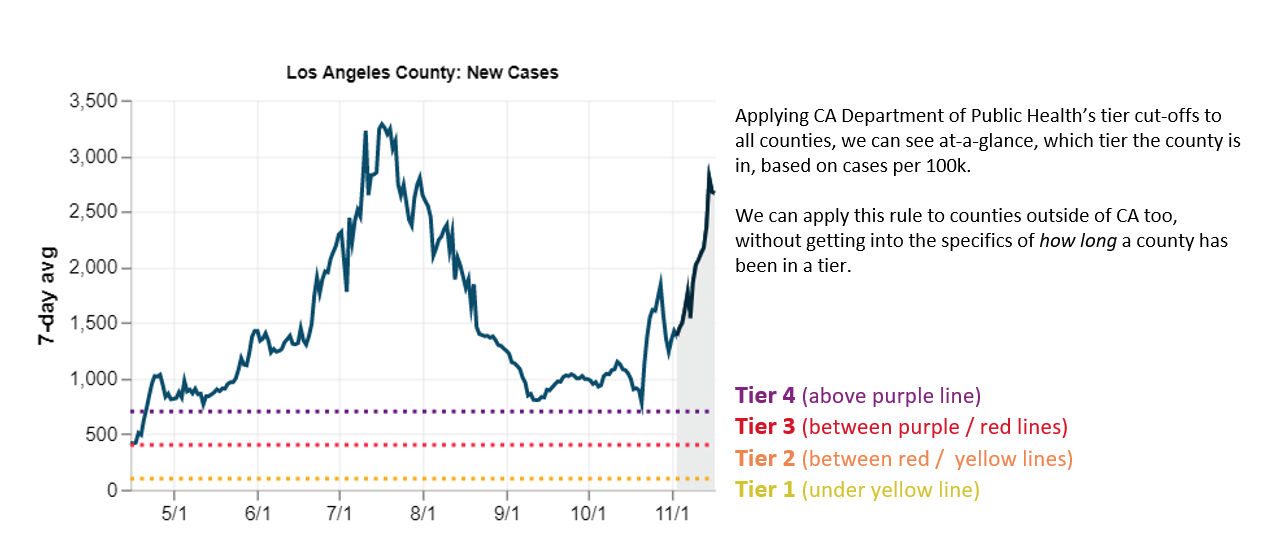

In [5]:
display(Markdown("<strong>Cases chart, explained</strong>"))
Image("../notebooks/chart_parts_explained.png", width=700)

<a id='counties_by_region'></a>

## Counties by Region
<strong>Superior California Region: </strong> [Butte](#butte), Colusa, 
[El Dorado](#el_dorado), 
Glenn, 
[Lassen](#lassen), Modoc, 
[Nevada](#nevada), 
[Placer](#placer), Plumas, 
[Sacramento](#sacramento), 
[Shasta](#shasta), Sierra, Siskiyou, 
[Sutter](#sutter), 
[Tehama](#tehama), 
[Yolo](#yolo), 
[Yuba](#yuba)
<br>
<strong>North Coast:</strong> [Del Norte](#del_norte), 
[Humboldt](#humboldt), 
[Lake](#lake), 
[Mendocino](#mendocino), 
[Napa](#napa), 
[Sonoma](#sonoma), Trinity
<br>
<strong>San Francisco Bay Area:</strong> [Alameda](#alameda), 
[Contra Costa](#contra_costa), 
[Marin](#marin), 
[San Francisco](#san_francisco), 
[San Mateo](#san_mateo), 
[Santa Clara](#santa_clara), 
[Solano](#solano)
<br>
<strong>Northern San Joaquin Valley:</strong> Alpine, Amador, Calaveras, 
[Madera](#madera), Mariposa, 
[Merced](#merced), 
Mono, 
[San Joaquin](#san_joaquin), 
[Stanislaus](#stanislaus), 
[Tuolumne](#tuolumne)
<br>
<strong>Central Coast:</strong> [Monterey](#monterey), 
[San Benito](#san_benito), 
[San Luis Obispo](#slo), 
[Santa Barbara](#santa_barbara), 
[Santa Cruz](#santa_cruz), 
[Ventura](#ventura)
<br>
<strong>Southern San Joaquin Valley:</strong> [Fresno](#fresno), 
Inyo, 
[Kern](#kern), 
[Kings](#kings), 
[Tulare](#tulare)
<br>
<strong>Southern California:</strong> [Los Angeles](#la), 
[Orange](#orange), 
[Riverside](#riverside), 
[San Bernardino](#san_bernardino)
<br>
<strong>San Diego-Imperial:</strong> [Imperial](#imperial), 
[San Diego](#san_diego)

<br>
Note for <i>small values</i>: If the 7-day rolling average of new cases or new deaths is under 10, the 7-day rolling average is listed for the past week, rather than a percent change. Given that it is a rolling average, decimals are possible, and are rounded to 1 decimal place. Similarly for hospitalizations.

<a id='la'></a>
[Return to top](#counties_by_region)

#### Los Angeles, CA

As of 11/23/20, there were **370,636** total cases and **7,446** total deaths. <br>In the past week, new cases grew by **51.2%**; new deaths grew by **74.5%**. <br>In the past week, the doubling time went from **84 days** to **57 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **29.5%**.; COVID ICU hospitalizations grew by **27.4%**. 

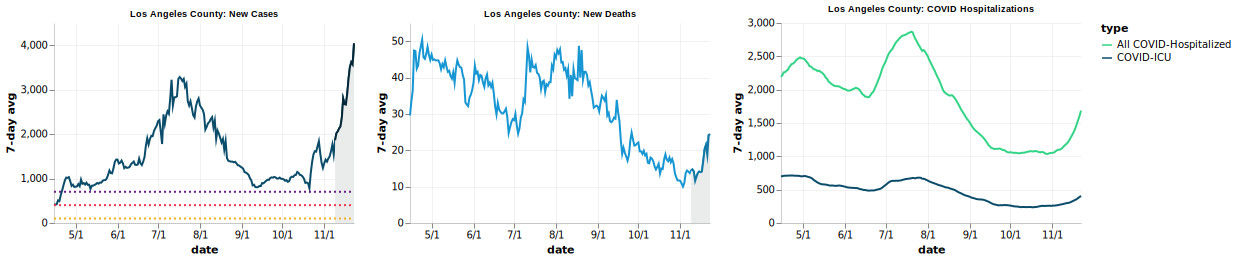

In [6]:
c = "Los Angeles"
plot_charts(jhu, hospitalizations, c)

<a id='alameda'></a>
[Return to top](#counties_by_region)

#### Alameda, CA

As of 11/23/20, there were **27,622** total cases and **499** total deaths. <br>In the past week, new cases grew by **50.6%**; new deaths went from **2.1** to **1.3**. <br>In the past week, the doubling time went from **114 days** to **97 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **17.7%**.; COVID ICU hospitalizations grew by **4.4%**. 

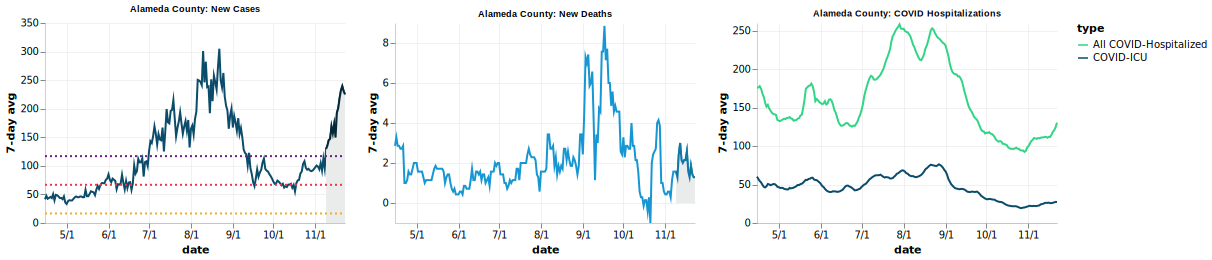

In [7]:
c = "Alameda"
plot_charts(jhu, hospitalizations, c)

<a id='butte'></a>
[Return to top](#counties_by_region)

#### Butte, CA

As of 11/23/20, there were **3,712** total cases and **59** total deaths. <br>In the past week, new cases grew by **55.7%**; new deaths went from **0.3** to **0.4**. <br>In the past week, the doubling time went from **93 days** to **67 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **43.7%**.; COVID ICU hospitalizations went from **1.0** to **2.0**. 

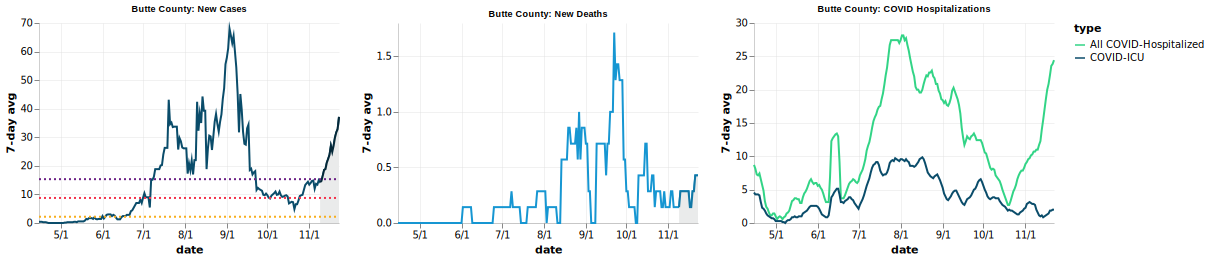

In [8]:
c = "Butte"
plot_charts(jhu, hospitalizations, c)

<a id='contra_costa'></a>
[Return to top](#counties_by_region)

#### Contra Costa, CA

As of 11/23/20, there were **22,482** total cases and **258** total deaths. <br>In the past week, new cases grew by **1.1%**; new deaths went from **0.0** to **0.7**. <br>In the past week, the doubling time went from **82 days** to **89 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **39.9%**.; COVID ICU hospitalizations grew by **38.8%**. 

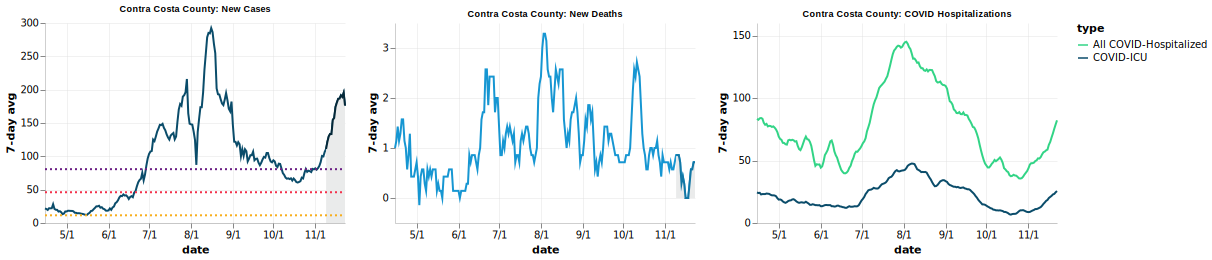

In [9]:
c = "Contra Costa"
plot_charts(jhu, hospitalizations, c)

<a id='del_norte'></a>
[Return to top](#counties_by_region)

#### Del Norte, CA

As of 11/23/20, there were **273** total cases and **1** total deaths. <br>In the past week, new cases went from **3.0**  to **7**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **44 days** to **28 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **0.0** to **0.0**.; COVID ICU hospitalizations went from **0.0** to **0.0**. 

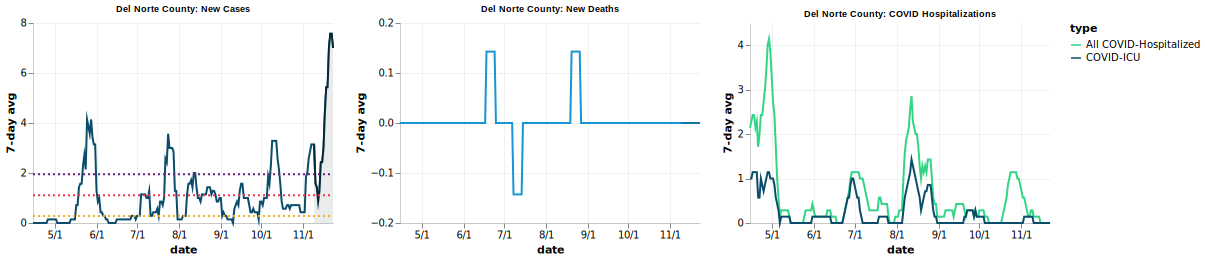

In [10]:
c = "Del Norte"
plot_charts(jhu, hospitalizations, c)

<a id='el_dorado'></a>
[Return to top](#counties_by_region)

#### El Dorado, CA

As of 11/23/20, there were **1,930** total cases and **4** total deaths. <br>In the past week, new cases grew by **36.5%**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **46 days** to **33 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **4.3** to **8.1**.; COVID ICU hospitalizations went from **4.3** to **4.9**. 

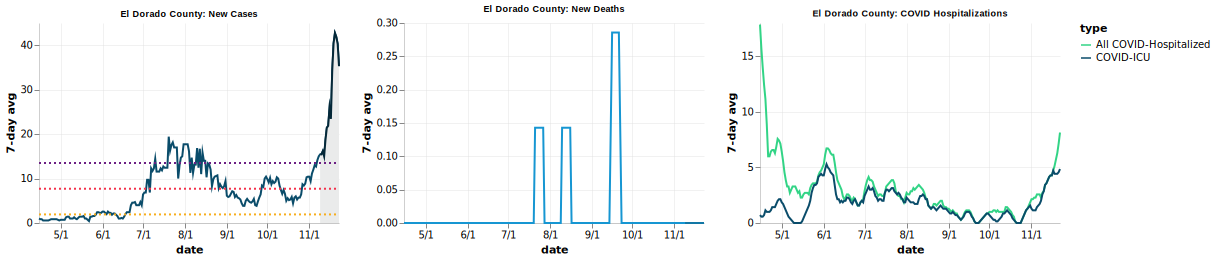

In [11]:
c = "El Dorado"
plot_charts(jhu, hospitalizations, c)

<a id='fresno'></a>
[Return to top](#counties_by_region)

#### Fresno, CA

As of 11/23/20, there were **36,315** total cases and **471** total deaths. <br>In the past week, new cases grew by **20.3%**; new deaths went from **0.9** to **1.6**. <br>In the past week, the doubling time went from **90 days** to **86 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **37.8%**.; COVID ICU hospitalizations grew by **-0.9%**. 

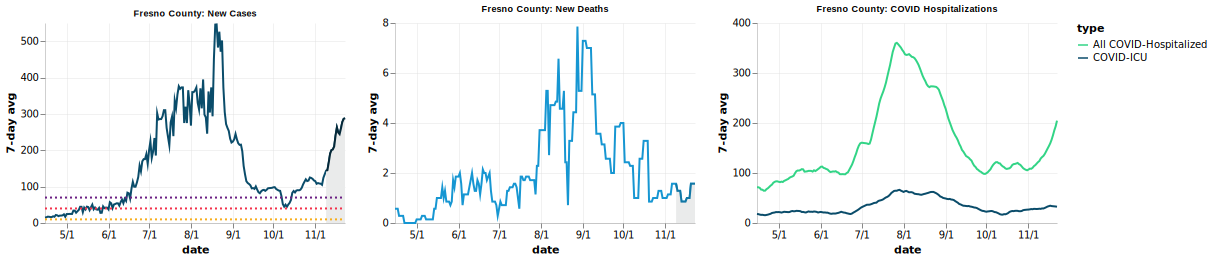

In [12]:
c = "Fresno"
plot_charts(jhu, hospitalizations, c)

<a id='humboldt'></a>
[Return to top](#counties_by_region)

#### Humboldt, CA

As of 11/23/20, there were **784** total cases and **9** total deaths. <br>In the past week, new cases went from **9.4**  to **14**; new deaths went from **0.0** to **-0.1**. <br>In the past week, the doubling time went from **43 days** to **35 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **5.1** to **5.7**.; COVID ICU hospitalizations went from **1.4** to **1.0**. 

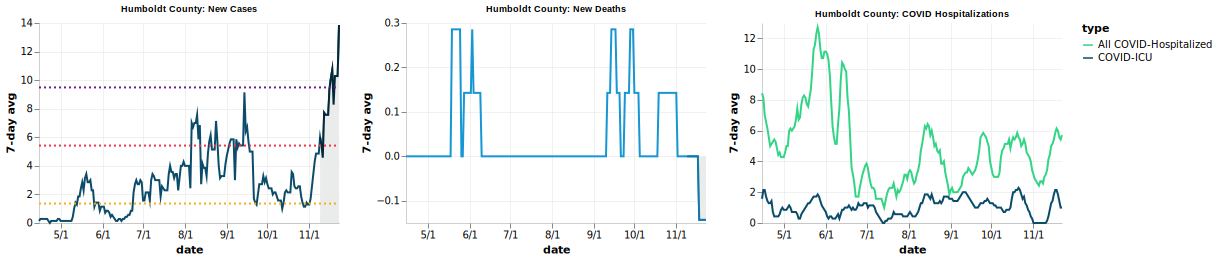

In [13]:
c = "Humboldt"
plot_charts(jhu, hospitalizations, c)

<a id='imperial'></a>
[Return to top](#counties_by_region)

#### Imperial, CA

As of 11/23/20, there were **15,257** total cases and **355** total deaths. <br>In the past week, new cases grew by **74.0%**; new deaths went from **1.4** to **0.6**. <br>In the past week, the doubling time went from **132 days** to **64 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **9.2%**.; COVID ICU hospitalizations grew by **4.0%**. 

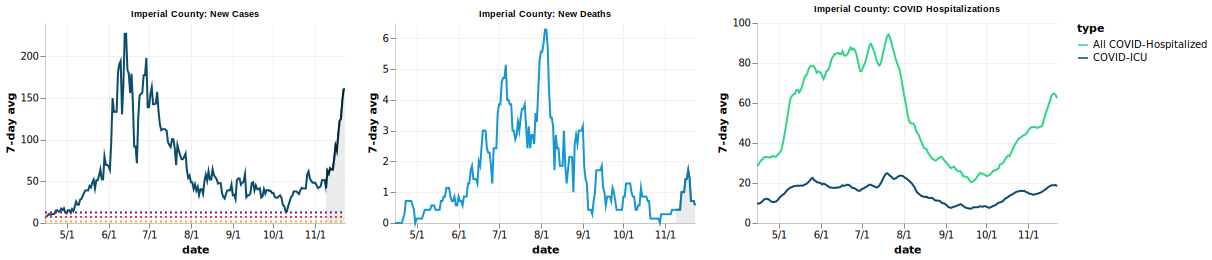

In [14]:
c = "Imperial"
plot_charts(jhu, hospitalizations, c)

<a id='kern'></a>
[Return to top](#counties_by_region)

#### Kern, CA

As of 11/23/20, there were **38,519** total cases and **445** total deaths. <br>In the past week, new cases grew by **55.3%**; new deaths went from **0.4** to **1.9**. <br>In the past week, the doubling time went from **130 days** to **98 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **55.0%**.; COVID ICU hospitalizations grew by **31.8%**. 

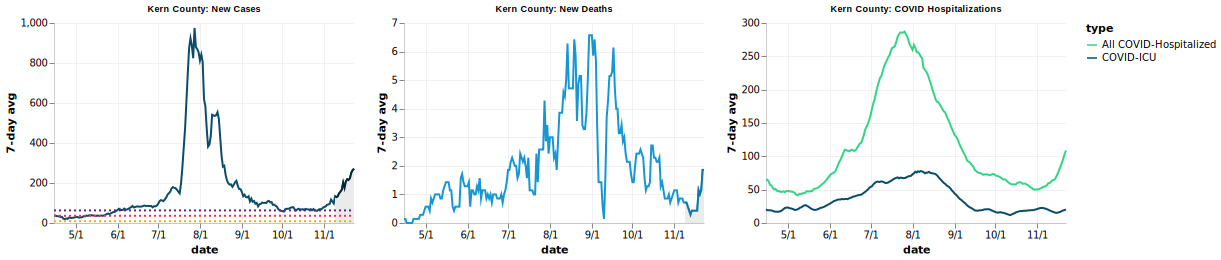

In [15]:
c = "Kern"
plot_charts(jhu, hospitalizations, c)

<a id='kings'></a>
[Return to top](#counties_by_region)

#### Kings, CA

As of 11/23/20, there were **10,115** total cases and **86** total deaths. <br>In the past week, new cases grew by **14.8%**; new deaths went from **0.0** to **-0.1**. <br>In the past week, the doubling time went from **99 days** to **80 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **88.6%**.; COVID ICU hospitalizations went from **3.4** to **5.9**. 

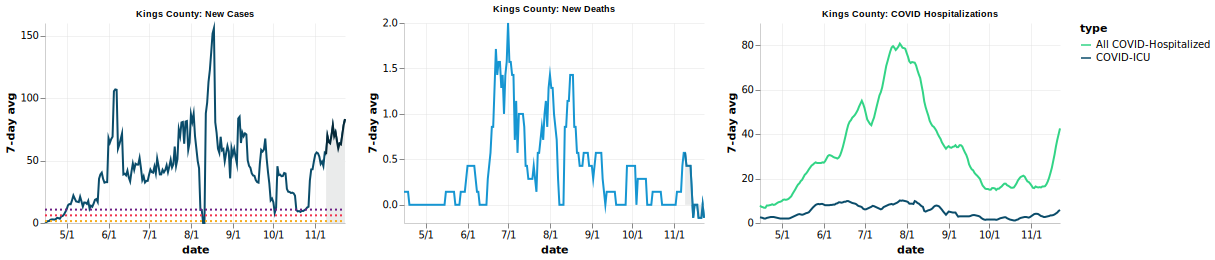

In [16]:
c = "Kings"
plot_charts(jhu, hospitalizations, c)

<a id='lake'></a>
[Return to top](#counties_by_region)

#### Lake, CA

As of 11/23/20, there were **834** total cases and **18** total deaths. <br>In the past week, new cases went from **3.3**  to **8**; new deaths went from **0.0** to **0.1**. <br>In the past week, the doubling time went from **152 days** to **73 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **2.1** to **1.4**.; COVID ICU hospitalizations went from **1.9** to **1.4**. 

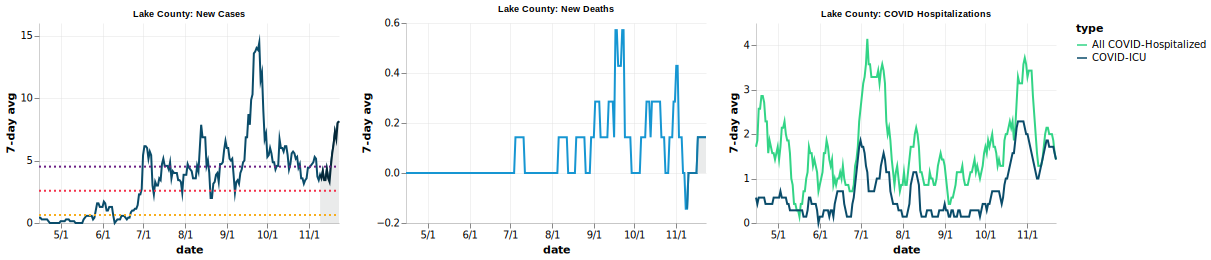

In [17]:
c = "Lake"
plot_charts(jhu, hospitalizations, c)

<a id='lassen'></a>
[Return to top](#counties_by_region)

#### Lassen, CA

As of 11/23/20, there were **1,480** total cases and **3** total deaths. <br>In the past week, new cases grew by **2.7%**; new deaths went from **0.0** to **0.3**. <br>In the past week, the doubling time went from **12 days** to **16 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **0.7** to **1.0**.; COVID ICU hospitalizations went from **0.0** to **0.0**. 

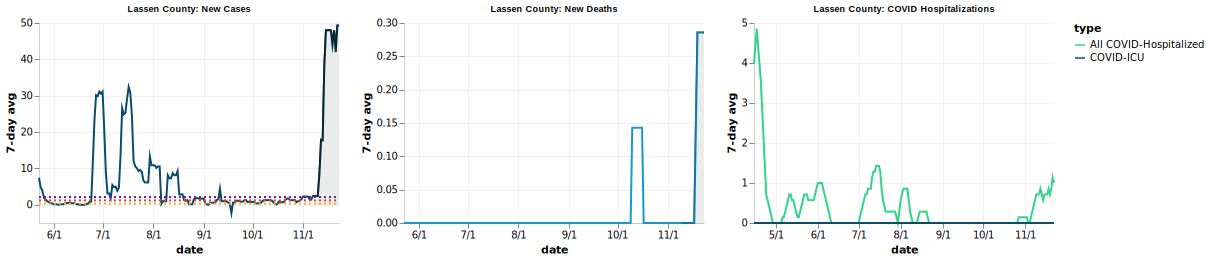

In [18]:
c = "Lassen"
plot_charts(jhu, hospitalizations, c)

<a id='madera'></a>
[Return to top](#counties_by_region)

#### Madera, CA

As of 11/23/20, there were **5,885** total cases and **80** total deaths. <br>In the past week, new cases grew by **78.4%**; new deaths went from **0.0** to **0.6**. <br>In the past week, the doubling time went from **123 days** to **73 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **22.1%**.; COVID ICU hospitalizations went from **2.0** to **4.4**. 

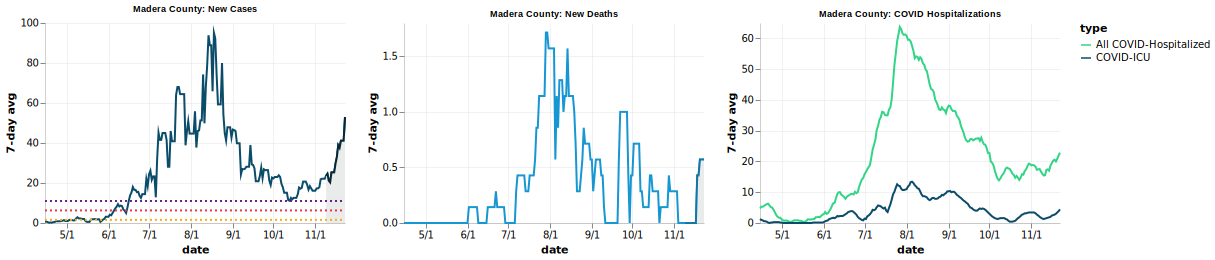

In [19]:
c = "Madera"
plot_charts(jhu, hospitalizations, c)

<a id='marin'></a>
[Return to top](#counties_by_region)

#### Marin, CA

As of 11/23/20, there were **7,560** total cases and **128** total deaths. <br>In the past week, new cases grew by **46.8%**; new deaths went from **0.0** to **0.1**. <br>In the past week, the doubling time went from **282 days** to **206 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **-27.5%**.; COVID ICU hospitalizations went from **2.9** to **3.3**. 

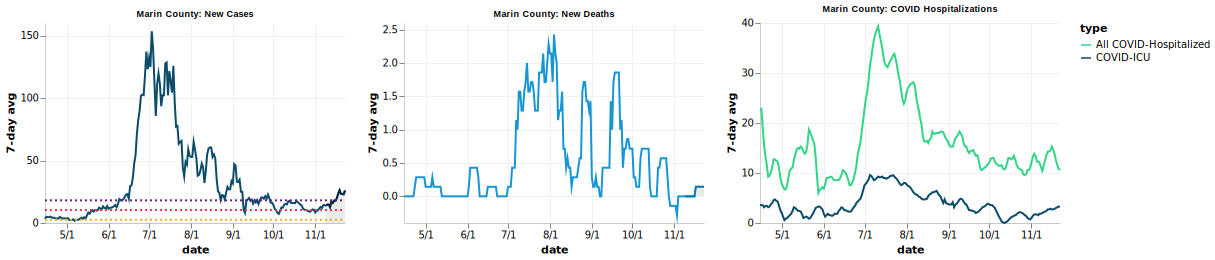

In [20]:
c = "Marin"
plot_charts(jhu, hospitalizations, c)

<a id='mendocino'></a>
[Return to top](#counties_by_region)

#### Mendocino, CA

As of 11/23/20, there were **1,424** total cases and **22** total deaths. <br>In the past week, new cases grew by **53.9%**; new deaths went from **0.1** to **0.0**. <br>In the past week, the doubling time went from **77 days** to **50 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **5.3** to **4.3**.; COVID ICU hospitalizations went from **2.6** to **3.6**. 

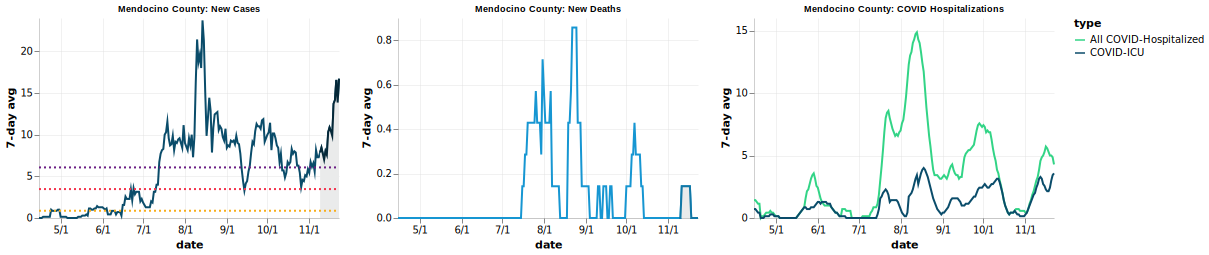

In [21]:
c = "Mendocino"
plot_charts(jhu, hospitalizations, c)

<a id='merced'></a>
[Return to top](#counties_by_region)

#### Merced, CA

As of 11/23/20, there were **10,986** total cases and **176** total deaths. <br>In the past week, new cases grew by **56.1%**; new deaths went from **0.7** to **1.0**. <br>In the past week, the doubling time went from **182 days** to **103 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **69.0%**.; COVID ICU hospitalizations went from **5.9** to **6.6**. 

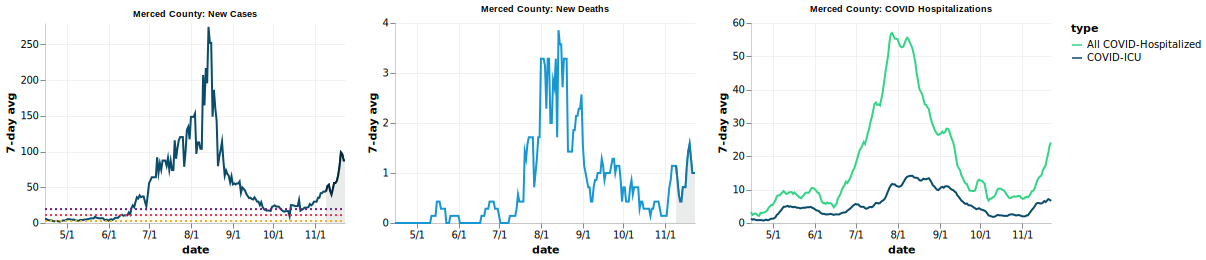

In [22]:
c = "Merced"
plot_charts(jhu, hospitalizations, c)

<a id='monterey'></a>
[Return to top](#counties_by_region)

#### Monterey, CA

As of 11/23/20, there were **13,887** total cases and **114** total deaths. <br>In the past week, new cases grew by **18.1%**; new deaths went from **1.3** to **0.6**. <br>In the past week, the doubling time went from **79 days** to **72 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **13.9%**.; COVID ICU hospitalizations went from **9.0** to **10.1**. 

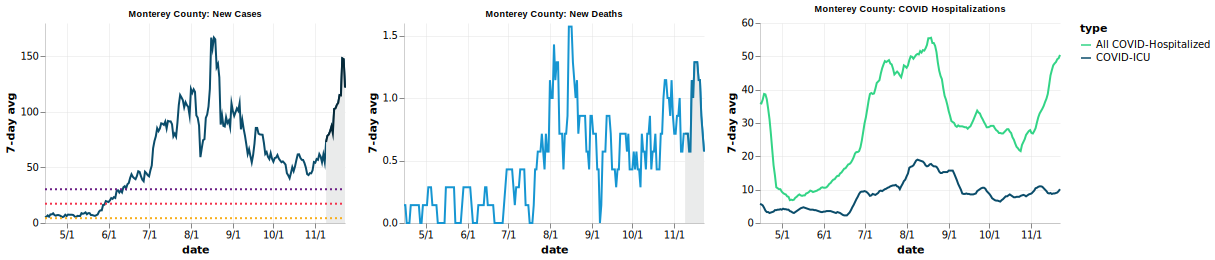

In [23]:
c = "Monterey"
plot_charts(jhu, hospitalizations, c)

<a id='napa'></a>
[Return to top](#counties_by_region)

#### Napa, CA

As of 11/23/20, there were **2,778** total cases and **17** total deaths. <br>In the past week, new cases grew by **14.5%**; new deaths went from **0.1** to **0.0**. <br>In the past week, the doubling time went from **50 days** to **46 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **8.0** to **5.9**.; COVID ICU hospitalizations went from **1.9** to **1.4**. 

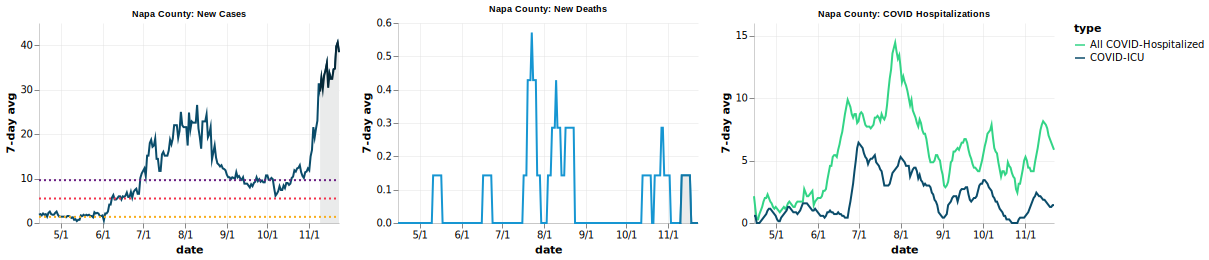

In [24]:
c = "Napa"
plot_charts(jhu, hospitalizations, c)

<a id='nevada'></a>
[Return to top](#counties_by_region)

#### Nevada, CA

As of 11/23/20, there were **1,052** total cases and **9** total deaths. <br>In the past week, new cases grew by **34.0%**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **25 days** to **27 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **4.6** to **8.7**.; COVID ICU hospitalizations went from **1.3** to **2.9**. 

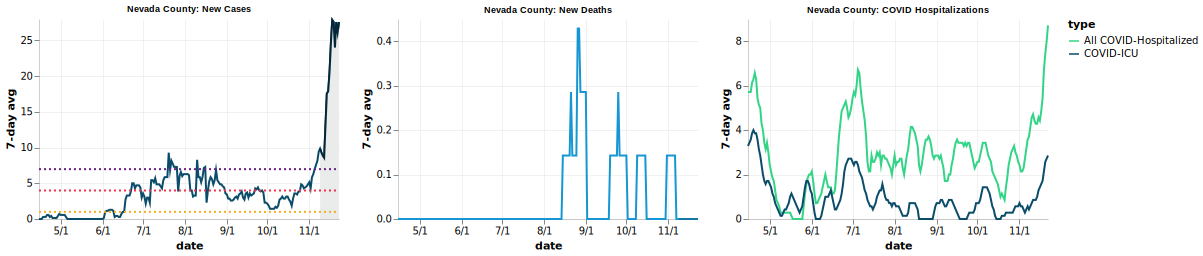

In [25]:
c = "Nevada"
plot_charts(jhu, hospitalizations, c)

<a id='orange'></a>
[Return to top](#counties_by_region)

#### Orange, CA

As of 11/23/20, there were **71,116** total cases and **1,554** total deaths. <br>In the past week, new cases grew by **81.2%**; new deaths went from **2.4** to **4.0**. <br>In the past week, the doubling time went from **96 days** to **55 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **37.5%**.; COVID ICU hospitalizations grew by **6.6%**. 

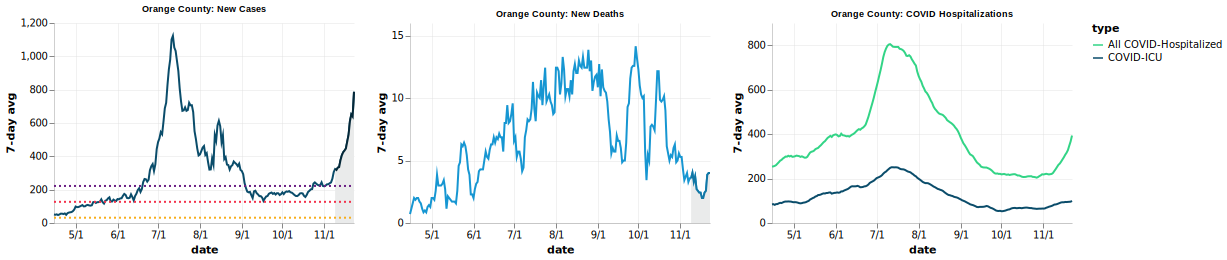

In [26]:
c = "Orange"
plot_charts(jhu, hospitalizations, c)

<a id='placer'></a>
[Return to top](#counties_by_region)

#### Placer, CA

As of 11/23/20, there were **6,071** total cases and **67** total deaths. <br>In the past week, new cases grew by **23.9%**; new deaths went from **0.6** to **0.4**. <br>In the past week, the doubling time went from **44 days** to **41 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **82.2%**.; COVID ICU hospitalizations went from **8.0** to **11.9**. 

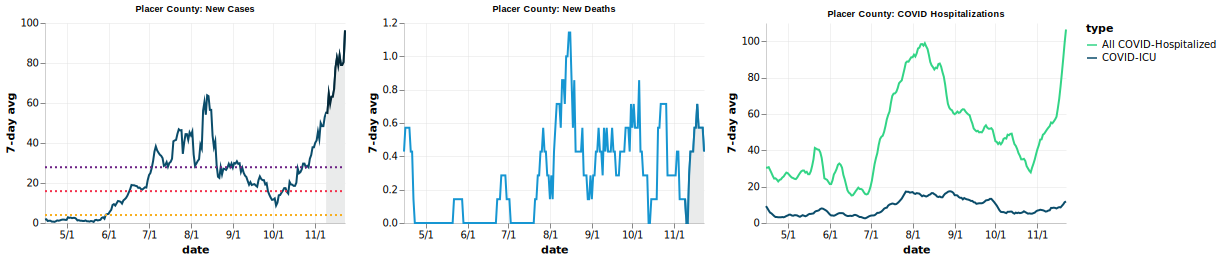

In [27]:
c = "Placer"
plot_charts(jhu, hospitalizations, c)

<a id='riverside'></a>
[Return to top](#counties_by_region)

#### Riverside, CA

As of 11/23/20, there were **81,565** total cases and **1,413** total deaths. <br>In the past week, new cases grew by **35.2%**; new deaths went from **5.1** to **5.6**. <br>In the past week, the doubling time went from **88 days** to **68 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **28.2%**.; COVID ICU hospitalizations grew by **25.4%**. 

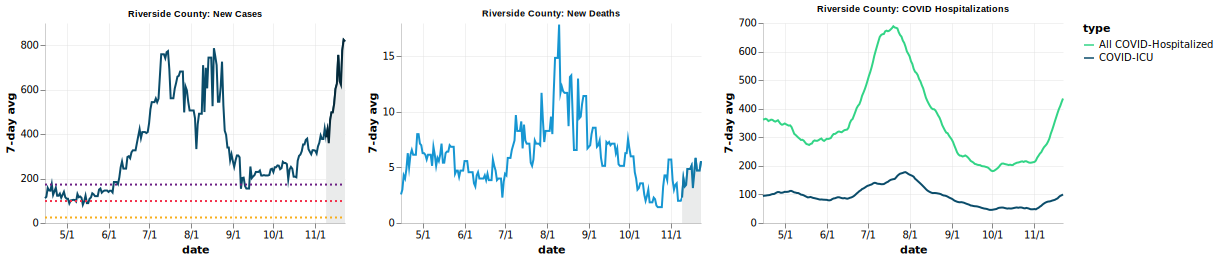

In [28]:
c = "Riverside"
plot_charts(jhu, hospitalizations, c)

<a id='sacramento'></a>
[Return to top](#counties_by_region)

#### Sacramento, CA

As of 11/23/20, there were **33,421** total cases and **546** total deaths. <br>In the past week, new cases grew by **10.9%**; new deaths went from **1.7** to **3.7**. <br>In the past week, the doubling time went from **52 days** to **55 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **35.6%**.; COVID ICU hospitalizations grew by **30.1%**. 

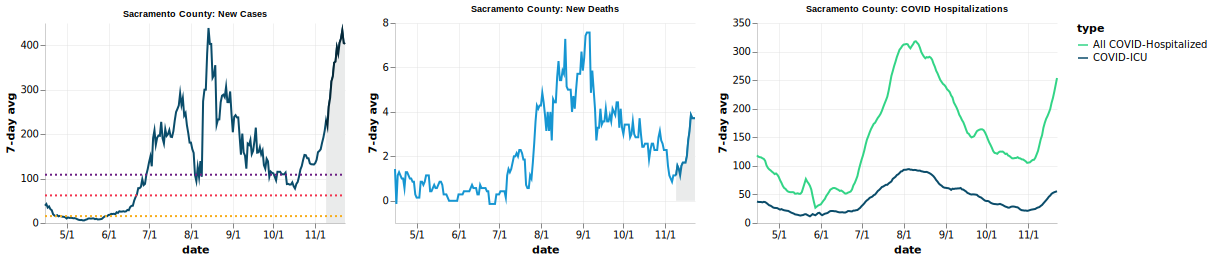

In [29]:
c = "Sacramento"
plot_charts(jhu, hospitalizations, c)

<a id='san_benito'></a>
[Return to top](#counties_by_region)

#### San Benito, CA

As of 11/23/20, there were **1,746** total cases and **15** total deaths. <br>In the past week, new cases grew by **22.3%**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **69 days** to **68 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **1.3** to **1.6**.; COVID ICU hospitalizations went from **1.0** to **1.0**. 

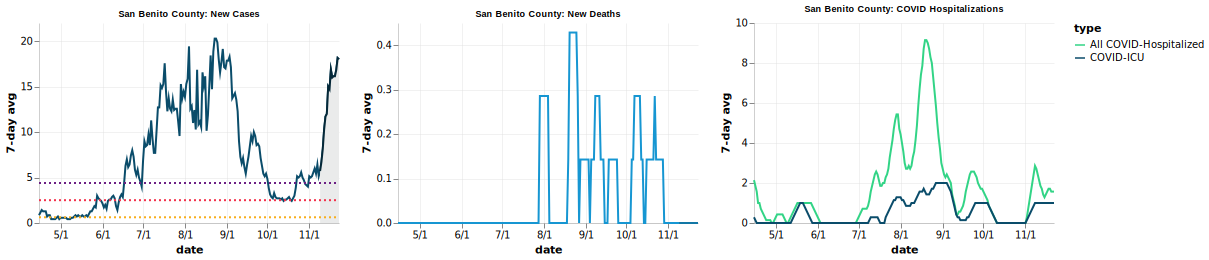

In [30]:
c = "San Benito"
plot_charts(jhu, hospitalizations, c)

<a id='san_bernardino'></a>
[Return to top](#counties_by_region)

#### San Bernardino, CA

As of 11/23/20, there were **85,176** total cases and **1,129** total deaths. <br>In the past week, new cases grew by **69.0%**; new deaths went from **0.3** to **4.4**. <br>In the past week, the doubling time went from **66 days** to **40 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **38.2%**.; COVID ICU hospitalizations grew by **43.9%**. 

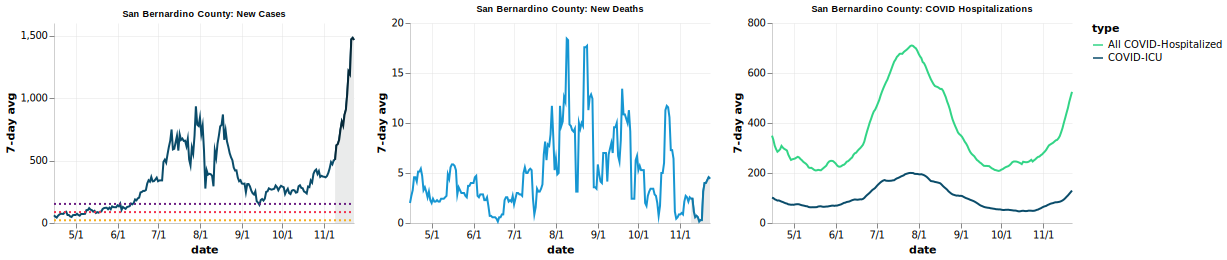

In [31]:
c = "San Bernardino"
plot_charts(jhu, hospitalizations, c)

<a id='san_diego'></a>
[Return to top](#counties_by_region)

#### San Diego, CA

As of 11/23/20, there were **72,815** total cases and **968** total deaths. <br>In the past week, new cases grew by **43.4%**; new deaths went from **-1.7** to **6.0**. <br>In the past week, the doubling time went from **58 days** to **45 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **27.2%**.; COVID ICU hospitalizations grew by **20.2%**. 

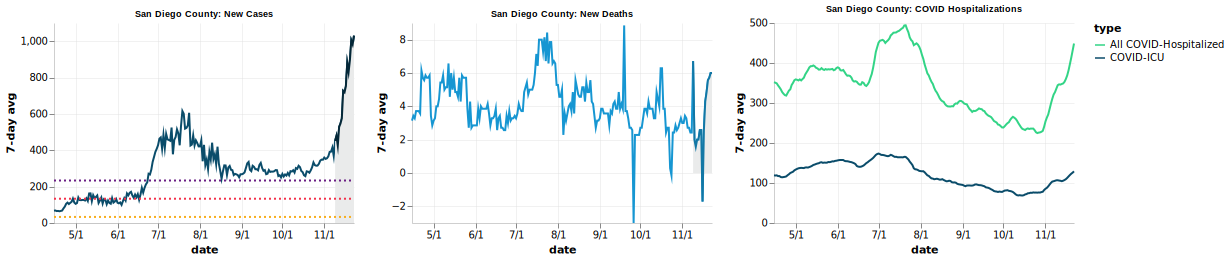

In [32]:
c = "San Diego"
plot_charts(jhu, hospitalizations, c)

<a id='san_francisco'></a>
[Return to top](#counties_by_region)

#### San Francisco, CA

As of 11/23/20, there were **14,542** total cases and **158** total deaths. <br>In the past week, new cases grew by **16.1%**; new deaths went from **0.7** to **0.3**. <br>In the past week, the doubling time went from **90 days** to **85 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **17.8%**.; COVID ICU hospitalizations grew by **33.8%**. 

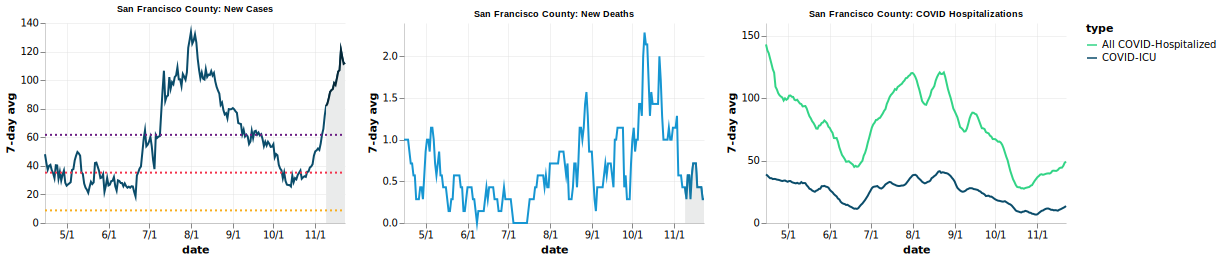

In [33]:
c = "San Francisco"
plot_charts(jhu, hospitalizations, c)

<a id='san_joaquin'></a>
[Return to top](#counties_by_region)

#### San Joaquin, CA

As of 11/23/20, there were **24,649** total cases and **503** total deaths. <br>In the past week, new cases grew by **28.3%**; new deaths went from **1.0** to **0.3**. <br>In the past week, the doubling time went from **124 days** to **110 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **36.1%**.; COVID ICU hospitalizations grew by **53.8%**. 

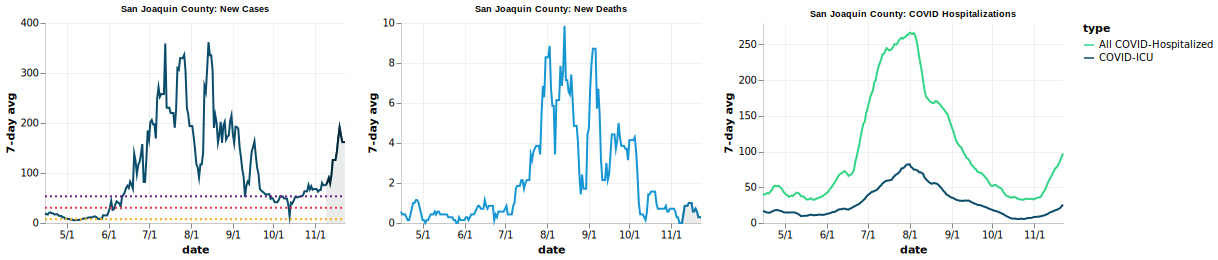

In [34]:
c = "San Joaquin"
plot_charts(jhu, hospitalizations, c)

<a id='slo'></a>
[Return to top](#counties_by_region)

#### San Luis Obispo, CA

As of 11/23/20, there were **5,664** total cases and **35** total deaths. <br>In the past week, new cases grew by **28.9%**; new deaths went from **0.0** to **0.3**. <br>In the past week, the doubling time went from **63 days** to **55 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **8.1** to **11.7**.; COVID ICU hospitalizations went from **2.4** to **1.9**. 

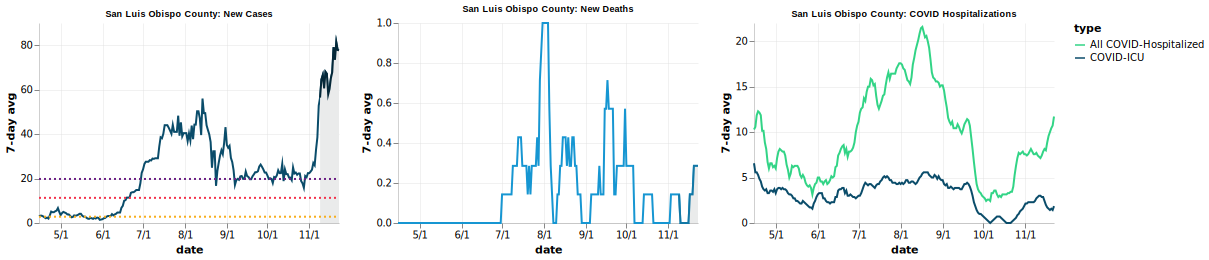

In [35]:
c = "San Luis Obispo"
plot_charts(jhu, hospitalizations, c)

<a id='san_mateo'></a>
[Return to top](#counties_by_region)

#### San Mateo, CA

As of 11/23/20, there were **13,334** total cases and **169** total deaths. <br>In the past week, new cases grew by **22.5%**; new deaths went from **0.9** to **0.1**. <br>In the past week, the doubling time went from **99 days** to **83 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **23.5%**.; COVID ICU hospitalizations went from **3.9** to **8.0**. 

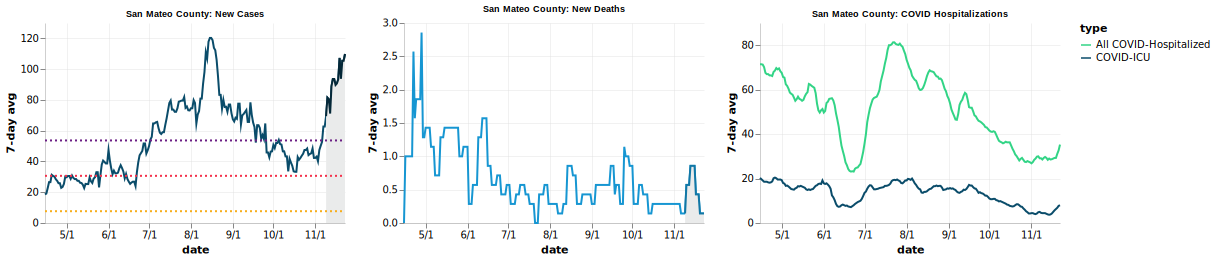

In [36]:
c = "San Mateo"
plot_charts(jhu, hospitalizations, c)

<a id='santa_barbara'></a>
[Return to top](#counties_by_region)

#### Santa Barbara, CA

As of 11/23/20, there were **10,946** total cases and **133** total deaths. <br>In the past week, new cases grew by **28.0%**; new deaths went from **0.0** to **0.3**. <br>In the past week, the doubling time went from **151 days** to **121 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **45.9%**.; COVID ICU hospitalizations went from **3.4** to **4.1**. 

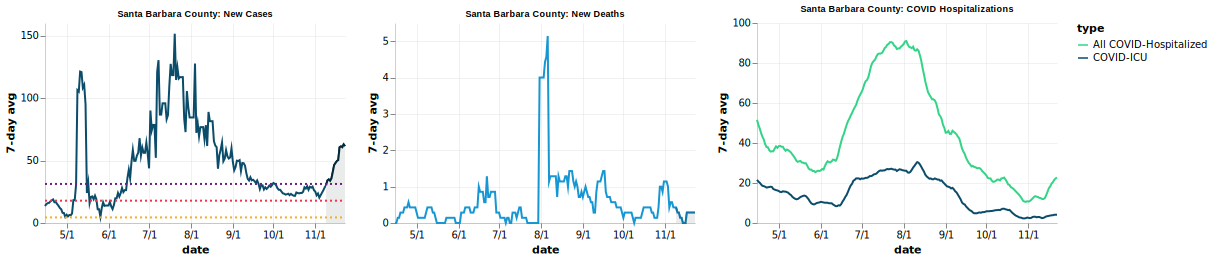

In [37]:
c = "Santa Barbara"
plot_charts(jhu, hospitalizations, c)

<a id='santa_clara'></a>
[Return to top](#counties_by_region)

#### Santa Clara, CA

As of 11/23/20, there were **31,103** total cases and **464** total deaths. <br>In the past week, new cases grew by **24.7%**; new deaths went from **1.7** to **2.7**. <br>In the past week, the doubling time went from **68 days** to **60 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **38.2%**.; COVID ICU hospitalizations grew by **46.0%**. 

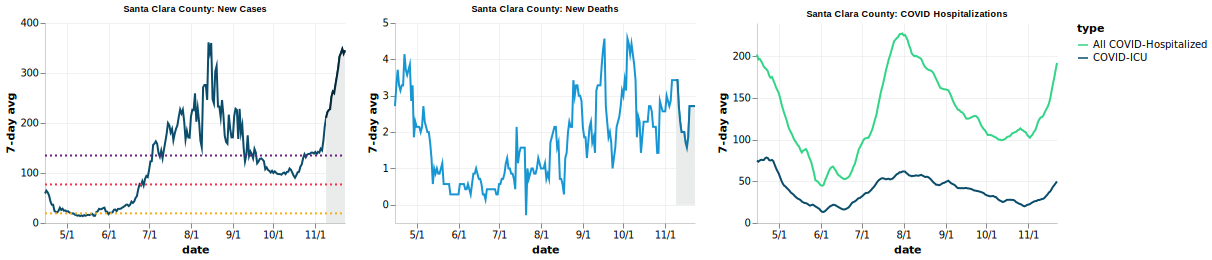

In [38]:
c = "Santa Clara"
plot_charts(jhu, hospitalizations, c)

<a id='santa_cruz'></a>
[Return to top](#counties_by_region)

#### Santa Cruz, CA

As of 11/23/20, there were **3,896** total cases and **27** total deaths. <br>In the past week, new cases grew by **49.8%**; new deaths went from **0.0** to **0.1**. <br>In the past week, the doubling time went from **64 days** to **44 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **55.7%**.; COVID ICU hospitalizations went from **3.4** to **7.0**. 

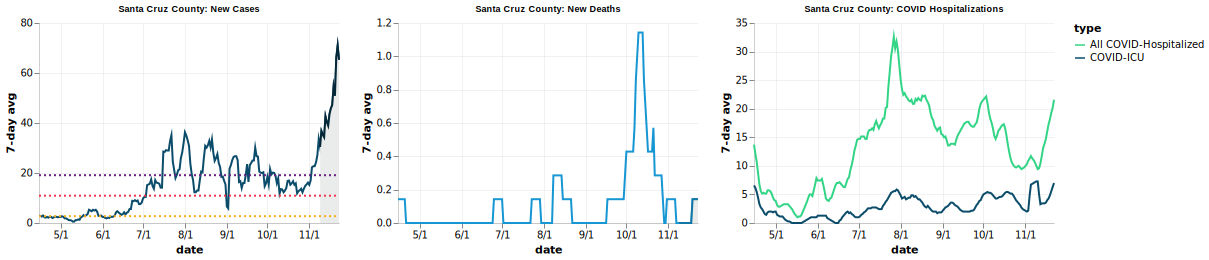

In [39]:
c = "Santa Cruz"
plot_charts(jhu, hospitalizations, c)

<a id='shasta'></a>
[Return to top](#counties_by_region)

#### Shasta, CA

As of 11/23/20, there were **4,100** total cases and **42** total deaths. <br>In the past week, new cases grew by **20.1%**; new deaths went from **0.3** to **0.9**. <br>In the past week, the doubling time went from **22 days** to **26 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **20.7%**.; COVID ICU hospitalizations went from **5.7** to **5.6**. 

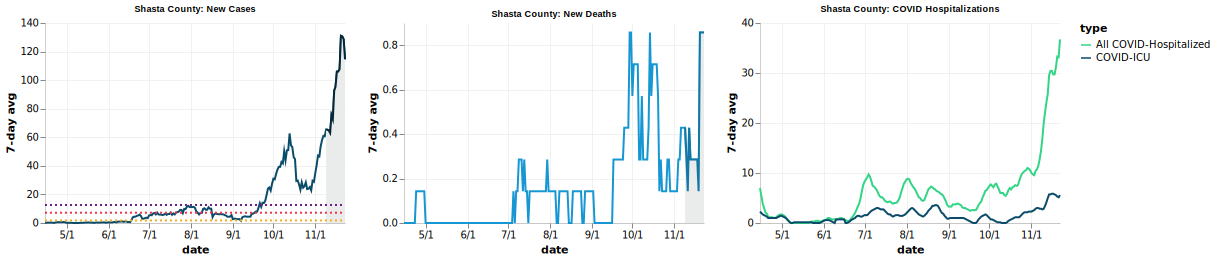

In [40]:
c = "Shasta"
plot_charts(jhu, hospitalizations, c)

<a id='solano'></a>
[Return to top](#counties_by_region)

#### Solano, CA

As of 11/23/20, there were **9,363** total cases and **80** total deaths. <br>In the past week, new cases grew by **-31.9%**; new deaths went from **0.0** to **0.1**. <br>In the past week, the doubling time went from **68 days** to **140 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **33.1%**.; COVID ICU hospitalizations grew by **0.0%**. 

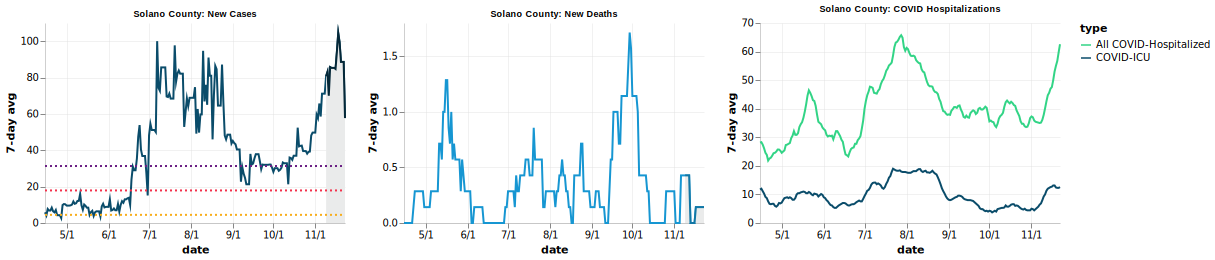

In [41]:
c = "Solano"
plot_charts(jhu, hospitalizations, c)

<a id='sonoma'></a>
[Return to top](#counties_by_region)

#### Sonoma, CA

As of 11/23/20, there were **11,486** total cases and **155** total deaths. <br>In the past week, new cases grew by **-31.7%**; new deaths went from **0.6** to **0.7**. <br>In the past week, the doubling time went from **81 days** to **133 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **9.9%**.; COVID ICU hospitalizations went from **5.9** to **8.0**. 

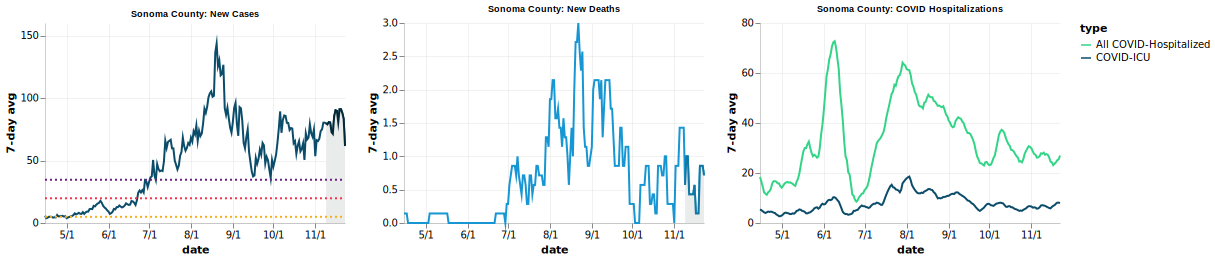

In [42]:
c = "Sonoma"
plot_charts(jhu, hospitalizations, c)

<a id='stanislaus'></a>
[Return to top](#counties_by_region)

#### Stanislaus, CA

As of 11/23/20, there were **20,658** total cases and **418** total deaths. <br>In the past week, new cases grew by **48.7%**; new deaths went from **0.6** to **0.9**. <br>In the past week, the doubling time went from **101 days** to **73 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **48.3%**.; COVID ICU hospitalizations grew by **-3.5%**. 

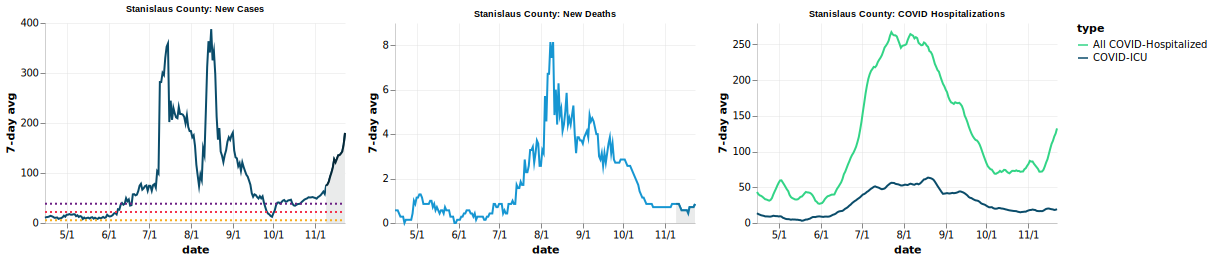

In [43]:
c = "Stanislaus"
plot_charts(jhu, hospitalizations, c)

<a id='sutter'></a>
[Return to top](#counties_by_region)

#### Sutter, CA

As of 11/23/20, there were **2,677** total cases and **13** total deaths. <br>In the past week, new cases grew by **87.8%**; new deaths went from **0.0** to **0.1**. <br>In the past week, the doubling time went from **55 days** to **38 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **0.0** to **0.0**.; COVID ICU hospitalizations went from **0.0** to **0.0**. 

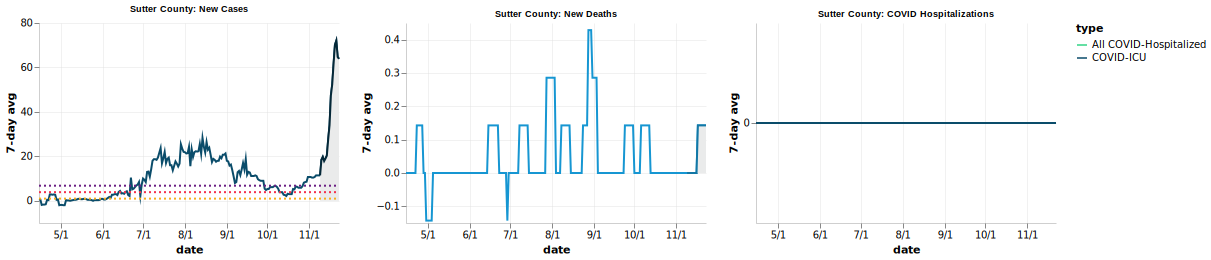

In [44]:
c = "Sutter"
plot_charts(jhu, hospitalizations, c)

<a id='tehama'></a>
[Return to top](#counties_by_region)

#### Tehama, CA

As of 11/23/20, there were **1,457** total cases and **23** total deaths. <br>In the past week, new cases grew by **39.9%**; new deaths went from **0.0** to **0.6**. <br>In the past week, the doubling time went from **32 days** to **29 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **6.3** to **9.9**.; COVID ICU hospitalizations went from **1.3** to **3.6**. 

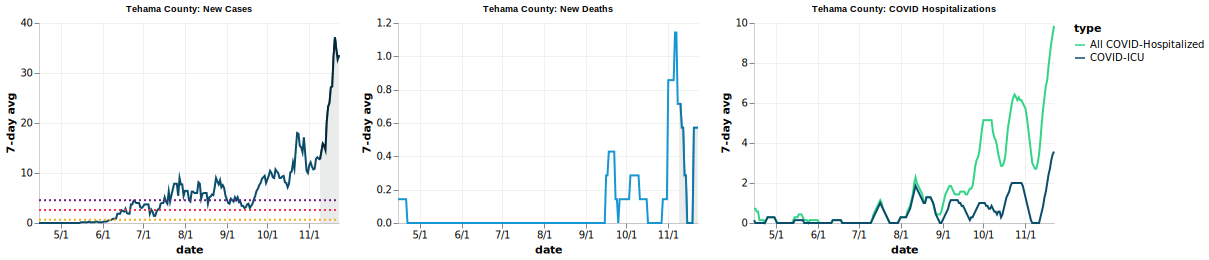

In [45]:
c = "Tehama"
plot_charts(jhu, hospitalizations, c)

<a id='tulare'></a>
[Return to top](#counties_by_region)

#### Tulare, CA

As of 11/23/20, there were **19,818** total cases and **303** total deaths. <br>In the past week, new cases grew by **57.9%**; new deaths went from **0.4** to **0.4**. <br>In the past week, the doubling time went from **166 days** to **106 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **20.4%**.; COVID ICU hospitalizations went from **4.7** to **7.7**. 

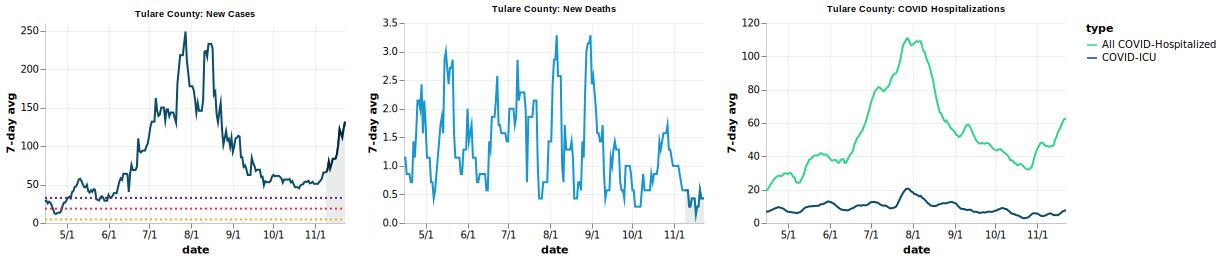

In [46]:
c = "Tulare"
plot_charts(jhu, hospitalizations, c)

<a id='tuolumne'></a>
[Return to top](#counties_by_region)

#### Tuolumne, CA

As of 11/23/20, there were **784** total cases and **8** total deaths. <br>In the past week, new cases grew by **0.5%**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **9 days** to **13 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **7.0** to **8.3**.; COVID ICU hospitalizations went from **0.6** to **1.6**. 

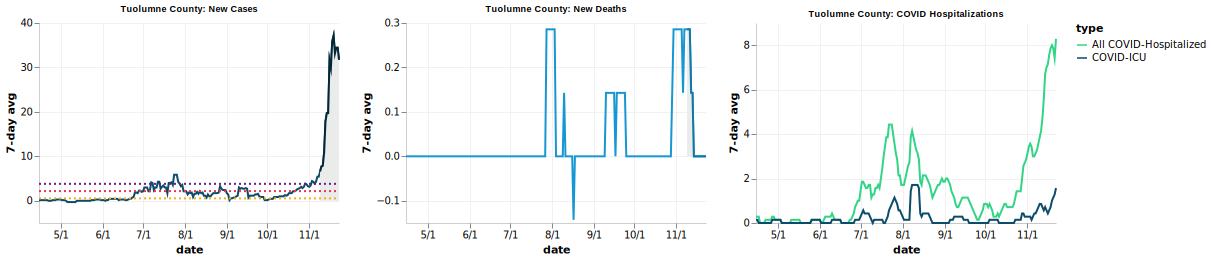

In [47]:
c = "Tuolumne"
plot_charts(jhu, hospitalizations, c)

<a id='ventura'></a>
[Return to top](#counties_by_region)

#### Ventura, CA

As of 11/23/20, there were **18,105** total cases and **174** total deaths. <br>In the past week, new cases grew by **45.4%**; new deaths went from **0.4** to **0.3**. <br>In the past week, the doubling time went from **67 days** to **51 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations grew by **36.6%**.; COVID ICU hospitalizations grew by **65.0%**. 

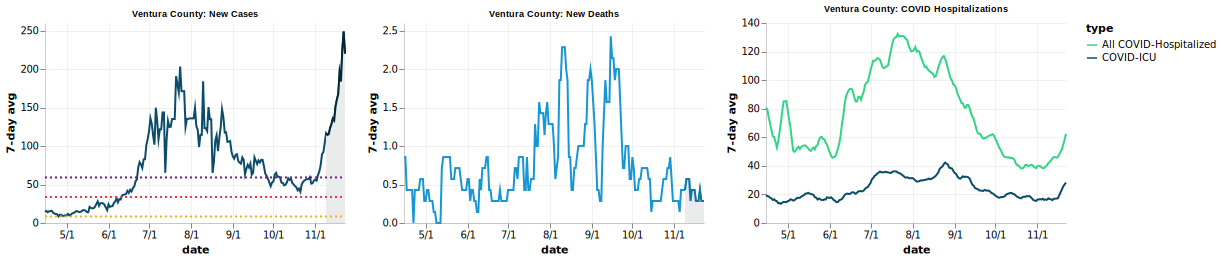

In [48]:
c = "Ventura"
plot_charts(jhu, hospitalizations, c)

<a id='yolo'></a>
[Return to top](#counties_by_region)

#### Yolo, CA

As of 11/23/20, there were **4,257** total cases and **75** total deaths. <br>In the past week, new cases grew by **17.3%**; new deaths went from **1.0** to **0.7**. <br>In the past week, the doubling time went from **54 days** to **46 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **8.6** to **14.0**.; COVID ICU hospitalizations went from **3.3** to **7.6**. 

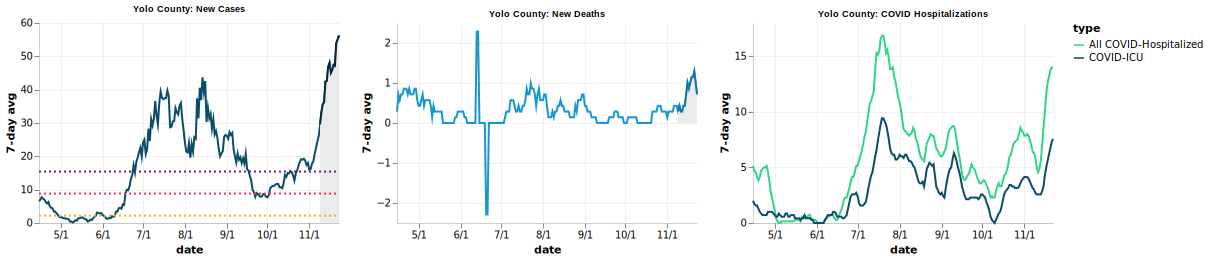

In [49]:
c = "Yolo"
plot_charts(jhu, hospitalizations, c)

<a id='yuba'></a>
[Return to top](#counties_by_region)

#### Yuba, CA

As of 11/23/20, there were **1,732** total cases and **10** total deaths. <br>In the past week, new cases grew by **59.1%**; new deaths went from **0.0** to **0.0**. <br>In the past week, the doubling time went from **100 days** to **61 days** <i><span style='color:#797C7C'>(longer doubling time is better)</span></i>. 

In the past week, all COVID hospitalizations went from **6.7** to **21.4**.; COVID ICU hospitalizations went from **2.3** to **4.6**. 

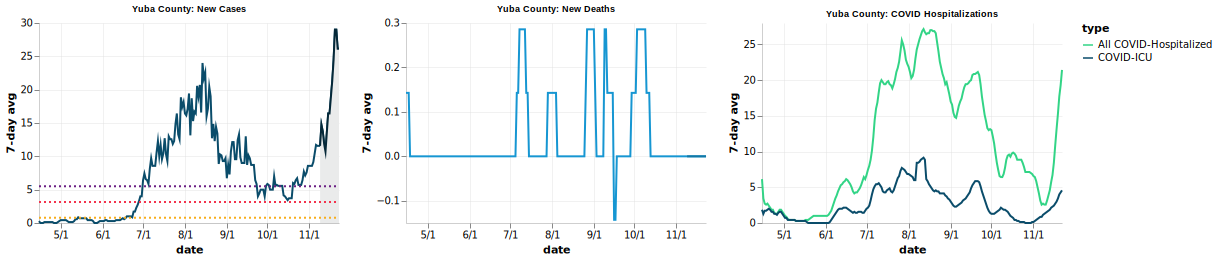

In [50]:
c = "Yuba"
plot_charts(jhu, hospitalizations, c)